In [ ]:
''' 
Aim: Implement expectation-maximization (EM) algorithm for clustering
tasks.

The expectation-maximization algorithm is an iterative optimization algorithm used for 
finding parameters is probabilistic models.especially when data has missing or hidden variables. 

When the data points belong to multiple clusters probabilistically rather than strictly belonging to one cluster.
When there are latent (hidden) var affecting the observed data.

Steps:
1. Expectation (E-Step)
● Based on the current parameters (means, covariances, and weights of clusters), compute
the probability that each data point belongs to each cluster.
● This probability is called the responsibility of the cluster for each data point.

 2: Maximization (M-Step)
● Update the parameters (means, covariances, and mixing coefficients) using the computed
probabilities from the E-Step.
● These updated parameters maximize the likelihood of the observed data.

3: Repeat Until Convergence
● The algorithm keeps repeating E-Step and M-Step until the parameter values converge
(i.e., they stop changing significantly).
'''

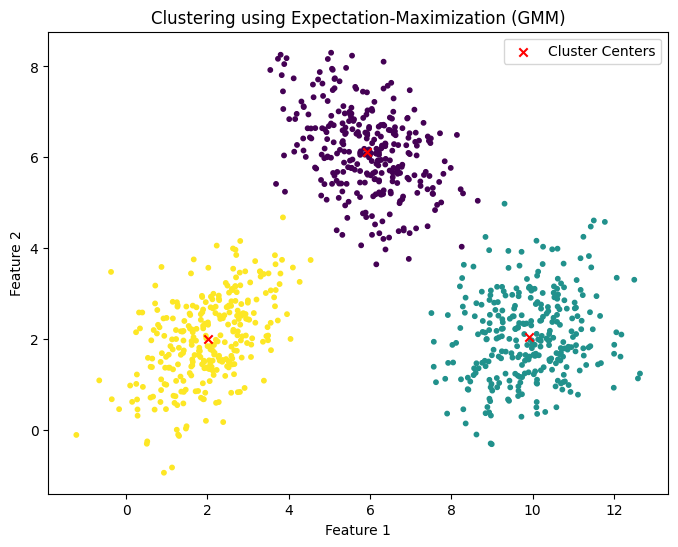

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generate synthetic data
np.random.seed(42)
n_samples = 300 #300 points per Gaussian component.

# Create data from three Gaussian distributions
#Mean and covariance matrix for each 2D Gaussian
mean1, cov1 = [2, 2], [[1, 0.5], [0.5, 1]]
mean2, cov2 = [6, 6], [[1, -0.5], [-0.5, 1]]
mean3, cov3 = [10, 2], [[1, 0.3], [0.3, 1]]

#Generating n_samples points from each distribution
data1 = np.random.multivariate_normal(mean1, cov1, n_samples)
data2 = np.random.multivariate_normal(mean2, cov2, n_samples)
data3 = np.random.multivariate_normal(mean3, cov3, n_samples)

# Combine into one dataset
#Vertically stacking all data into one dataset of shape (900,2)
data = np.vstack((data1, data2, data3))

# Fit Gaussian Mixture Model using Expectation-Maximization
#GMM with 3 components cluster, covariance_type='full' means Each component has its own general covariance matrix.
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(data)

# Get cluster labels
#Assigns each point to a Gaussian component based on maximum probability.
labels = gmm.predict(data)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=10)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='x', label='Cluster Centers')
plt.title("Clustering using Expectation-Maximization (GMM)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()